## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 7 #



In questa esercitazione abbiamo utilizzato l'algoritmo di Metropolis per simulare un ensemble canonico caratterizzato da un potenziale di Lennard Jones. Avevamo già in partenza un codice utile alla simulazione del sistema, Montecarlo NVT code, capace di stampare i valori istantanei di energia per particella $U/N$ e pressione $P$.

### esercizio 7.1

Nel primo esercizio abbiamo per prima cosa sfruttato il codice che ci era stato fornito per stampare i valori istantanei di $U/N$ e $P$, dopo aver equilibrato la simulazione Montecarlo e opportunamente settando un passo $\delta$ tale per cui il rate di accettazione della simulazione fosse di circa il $50%$.
Abbiamo ripetuto tale procedimento per tutte e tre le possibili fasi, la cui condizioni termodinamiche sono le seguenti:

- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$), $\delta = 0.12$  
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$), $\delta = 0.2$  
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$), $\delta = 3.5$  

Abbiamo per ogni fase fatto delle simulazioni da $5 \times 10^5$ step.
Una volta prodotti questi dati, abbiamo, tramite uno script python, applicati a questi la funzione di autocorrelazione, definita come: 

$$
A(n) = \frac{\frac{1}{n_{max} - n} \sum_{n'=0}^{n_{max}-n}{x(n')x(n' + n)} - \frac{1}{n_{max} - n}\sum_{n'=0}^{n_{max}-n}{x(n')}\sum_{n'=0}^{n_{max}-n}{x(n' + n)}}{\frac{1}{n_{max}}\sum_{n'=0}^{n_{max}}{x^2(n')} - \big(\frac{1}{n_{max}}\sum_{n'=0}^{n_{max}}x(n')\big)^2}
$$

La funzione di autocorrelazione indica il livello di correlazione presente da due variabili separate da $n$ passi.

Con questa siamo stati in grado di stimare in prima battuta l'ampiezza dei blocchi da utilizzare successivamente. Infatti, osservando lo step oltre il quale la funzione tendeva a stabilizzarsi intorno a zero, abbiamo ottenuto un limite sotto il quale non andare a fissare tale ampiezza.

Riportiamo di seguito i risultati ottenuti. Per queste stime abbiamo posto $nmax = 5000$.


#### stato solido


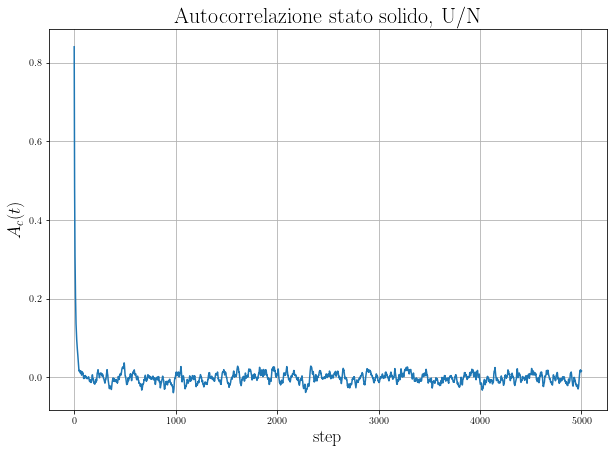

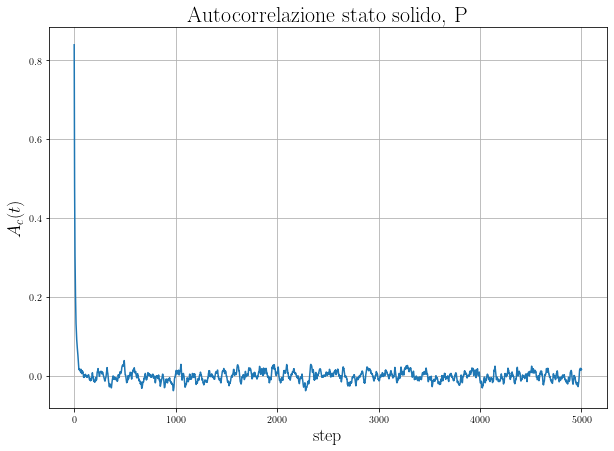

#### stato liquido
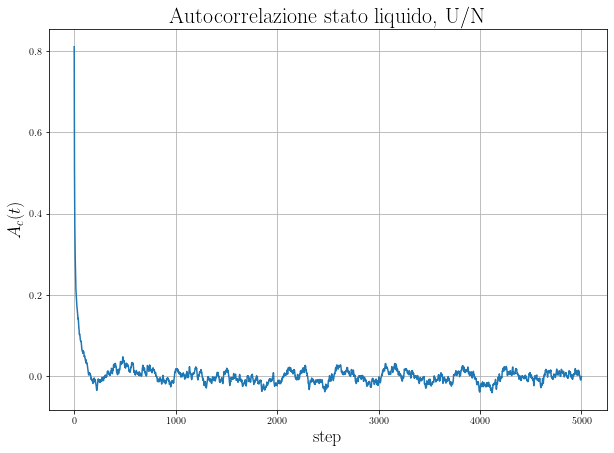

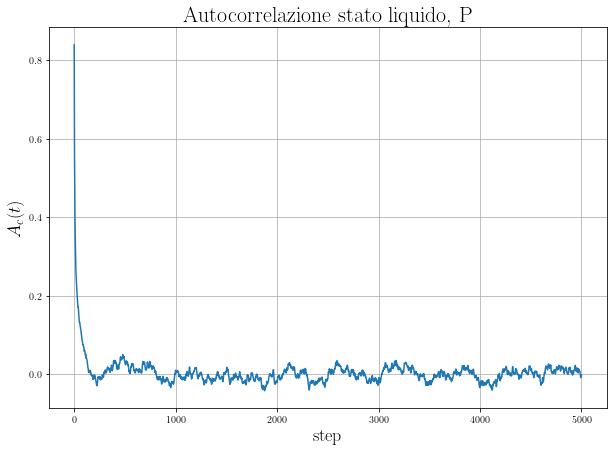


#### stato gassoso
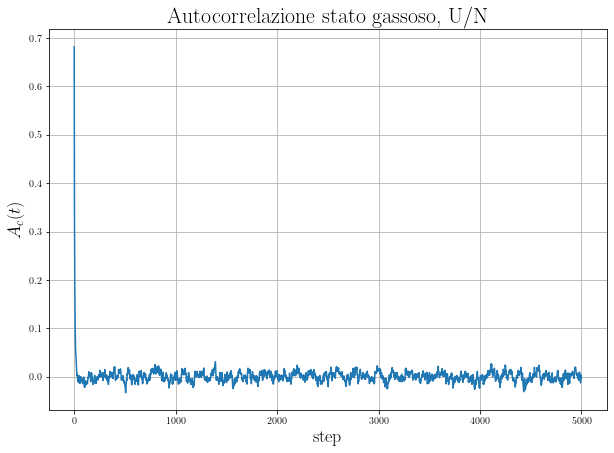

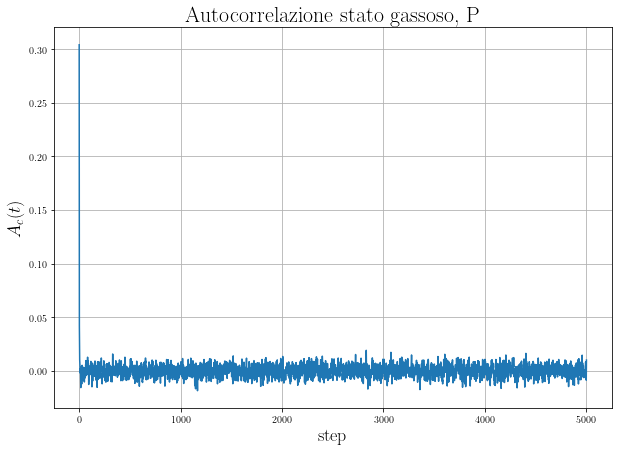


Si può notare come in tutte le fasi ben sotto i 1000 passi le variabili risultino essere tra loro scorrelate.

Successivamente, usando lo stesso set di dati simulato in precedenza, siamo andati a studiare la stima delle incertezze dei valori di aspettazione di $U/N$ e $P$ con il metodo del data blocking, in funzione della lunghezza del blocco $L$. Abbiamo fatto variare $L$ da $10$ a $5 \times 10^3$, procedendo a passi di $\Delta L = 20$.
Anche in questo caso ci siamo serviti di uno script in python. 

Riportiamo di seguito i risultati ottenuti.

#### stato solido

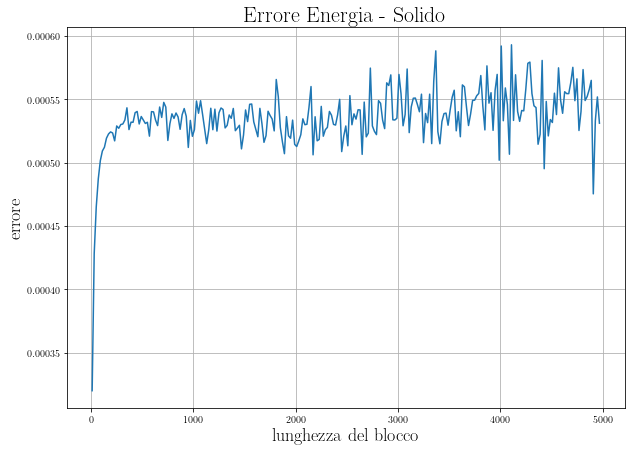

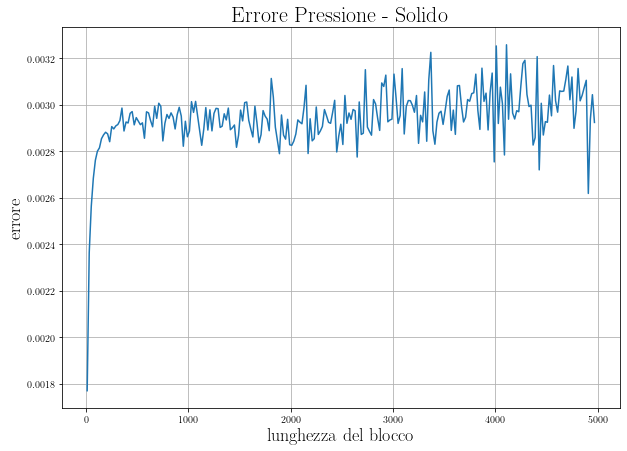


#### stato liquido

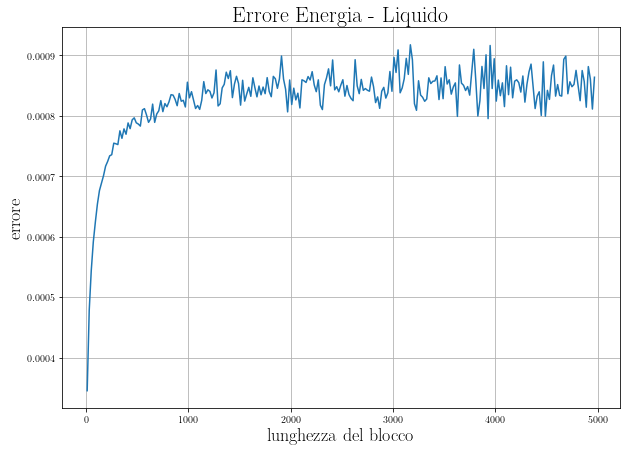

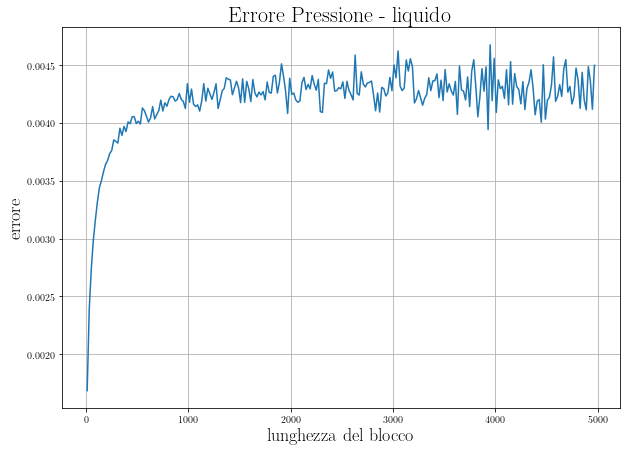



#### stato gassoso

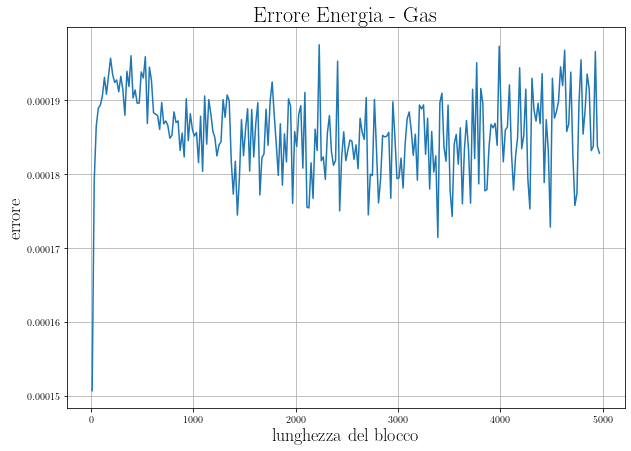

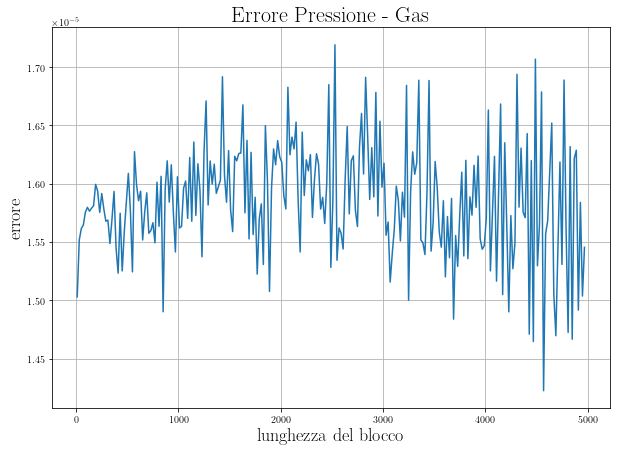

Si può notare come per una lunghezza dei blocchi troppo piccola l'errore tenda ad essere sottostimato. Per tutte e tre le fasi intorno ad una lunghezza dei blocchi di massimo 1000 l'errore sia già stabilizzato, sia per le misure di $U/N$ che di $P$.

### esercizio 7.2 - esercizio 7.3

In questi due esercizi abbiamo incluso il calcolo della funzione di distribuzione radiale $g(r)$, come funzione della distanza radiale $r$ tra le particelle, con $r \in \left[ 0; L/2\right]$ , rispettivamente, nel Montecarlo NVT code e nel Molecular Dynamics code dell'esercitazione 4. A questo scopo abbiamo diviso l'intervallo richiesto in 100 sottointervalli. Valutando poi la distanza tra tutte le coppie, abbiamo incrementato di 2 l'intervallo in cui cadeva la distanza $r$ trovata. Ciclando su tutte le coppie e tutti gli step abbiamo ottenuto un istogramma che rappresentasse la $g(r)$. Abbiamo infine opportunamente normalizzato l'istogramma ottenuto.

### esercizio 7.4

Implementati tutti i miglioramenti al codice abbiamo fatto una simulazione MC NVT con potenziale di Lennard Jones di Argon, caratterizzato dai seguenti parametri termodinamici $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu. Abbiamo eseguito le simulazionicon le seguenti configurazioni:

- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)  
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)  
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Per queste simulazioni abbiamo optato per un numero di step $M = 5 \times 10^5$, suddivisi in $100$ blocchi da $5000$ step l'uno. Abbiamo così misurato l'energia potenziale per particella, la pressione e la $g(r)$.

Successivamente abbiamo utilizzato il codice di Molecular Dynamics migliorato nell'esercizio precedente per stimare la $g(r)$ del sistema anche in un secondo modo.

Si riportano di seguito i risultati ottenuti in unità SI.

#### fase solida

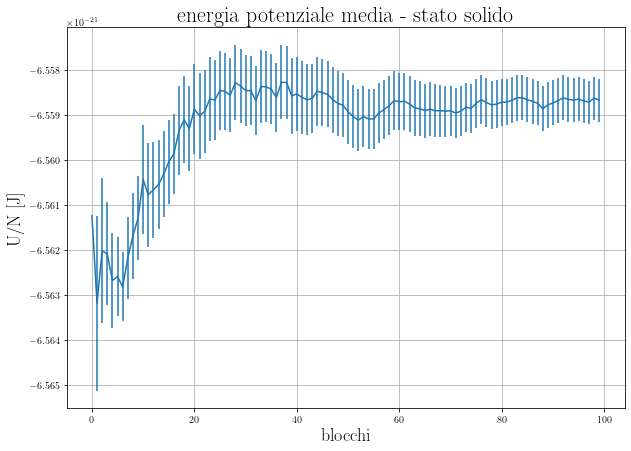

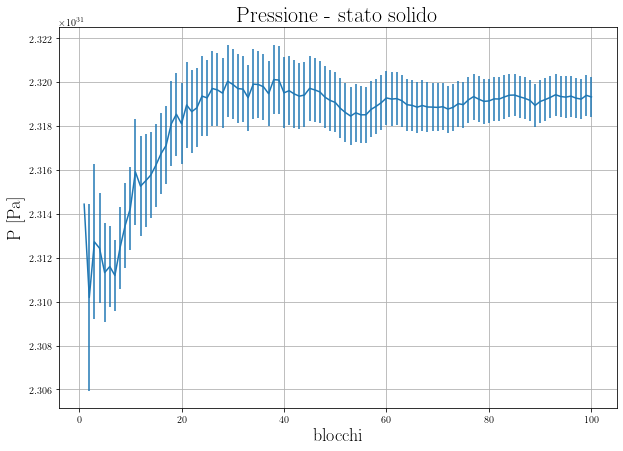

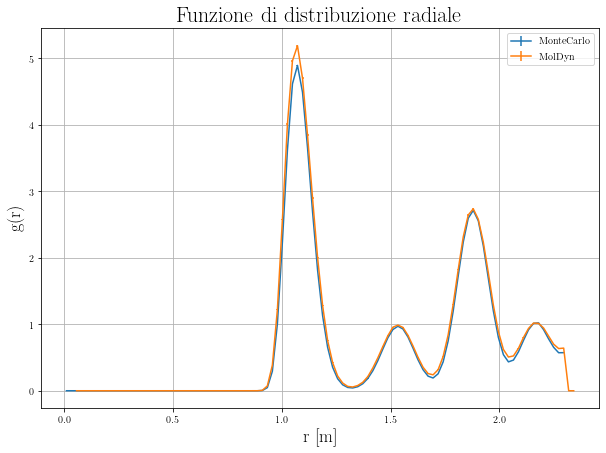

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')


sigma = 0.34e-9 #angstrom
f_T = 120. # fattore moltiplicativo temperatura in Kelvin
m = 39.948 #amu
f_V = 86.9156461925 * 10**(-23.) #fattore moltiplicativo dell'energia potenziale in Joule
P0 = f_T / (sigma**3)
#energia potenziale

f, error = np.loadtxt("output.epot.sol.0", usecols=(2,3), unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.grid(True)

plt.title("energia potenziale media - stato solido", fontsize=22)
plt.show()

#pressione

x1, f1, error1 = np.loadtxt("output.pres.sol.0", usecols=(0,2,3), unpack='true')
#x1 = np.arange(f1.size)


plt.figure(figsize=(10,7))
plt.errorbar(x1,P0*f1,yerr=P0*error1)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('P [Pa]', fontsize=18)

plt.title("Pressione - stato solido", fontsize=22)
plt.grid(True)
plt.show()

# g(r)


x, f, error = np.loadtxt("output.gave.sol.0", usecols=(0,1,2), unpack='true', delimiter=', ')
x2, f2, error2 = np.loadtxt("output.gave.sol.moldyn.0", usecols=(0,1,2), unpack='true', delimiter=', ')

plt.figure(figsize=(10,7))
plt.errorbar(x,f,yerr=error, label="MonteCarlo")
plt.errorbar(x2+0.046133,f2,yerr=error2, label="MolDyn")
plt.xlabel('r [m]', fontsize=18)
plt.ylabel('g(r)', fontsize=18)
plt.title("Funzione di distribuzione radiale", fontsize = 22)
plt.legend(loc ="best")
plt.grid(True)
plt.show()

#### fase liquida

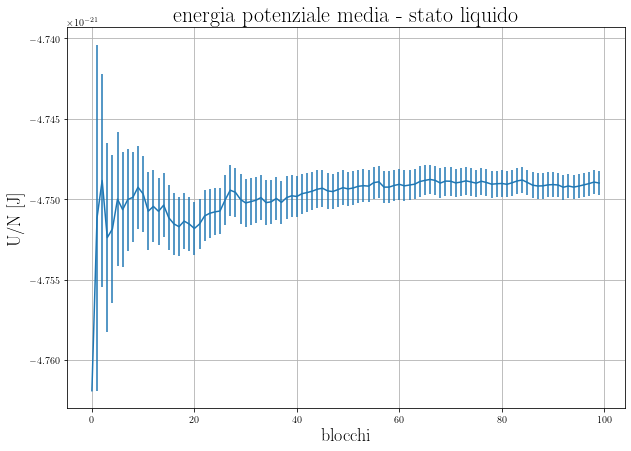

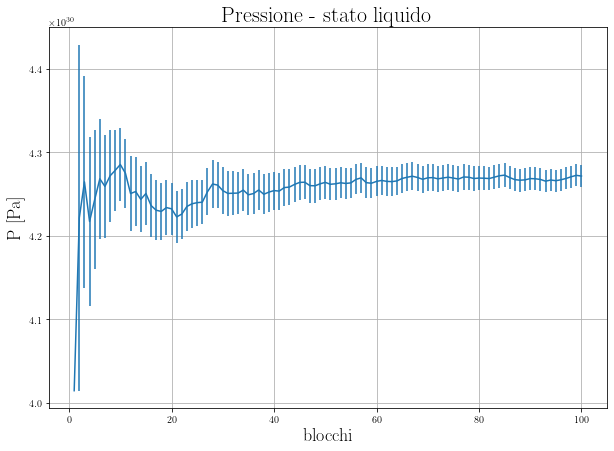

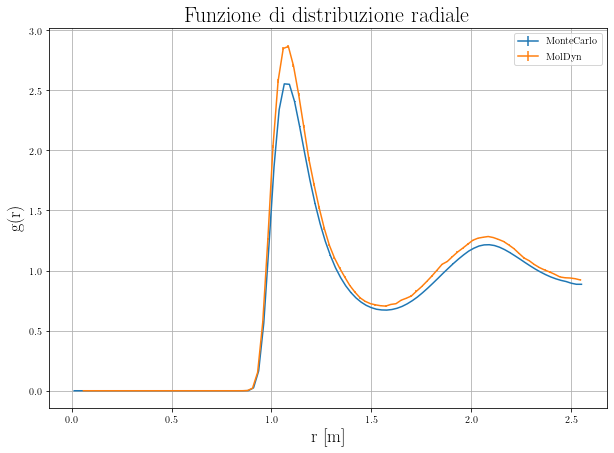

In [13]:
f, error = np.loadtxt("output.epot.liq.0", usecols=(2,3), unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.grid(True)

plt.title("energia potenziale media - stato liquido", fontsize=22)
plt.show()

#pressione

x1, f1, error1 = np.loadtxt("output.pres.liq.0", usecols=(0,2,3), unpack='true')
#x1 = np.arange(f1.size)


plt.figure(figsize=(10,7))
plt.errorbar(x1,P0*f1,yerr=P0*error1)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('P [Pa]', fontsize=18)

plt.title("Pressione - stato liquido", fontsize=22)
plt.grid(True)
plt.show()

# g(r)

x, f, error = np.loadtxt("output.gave.liq.0", usecols=(0,1,2), unpack='true', delimiter=', ')
x2, f2, error2 = np.loadtxt("output.gave.liq.moldyn.0", usecols=(0,1,2), unpack='true', delimiter=', ')

plt.figure(figsize=(10,7))
plt.errorbar(x,f,yerr=error, label="MonteCarlo")
plt.errorbar(x2+0.046133,f2,yerr=error2, label="MolDyn")
plt.xlabel('r [m]', fontsize=18)
plt.ylabel('g(r)', fontsize=18)
plt.title("Funzione di distribuzione radiale", fontsize = 22)
plt.legend(loc ="best")
plt.grid(True)
plt.show()

#### fase gassosa

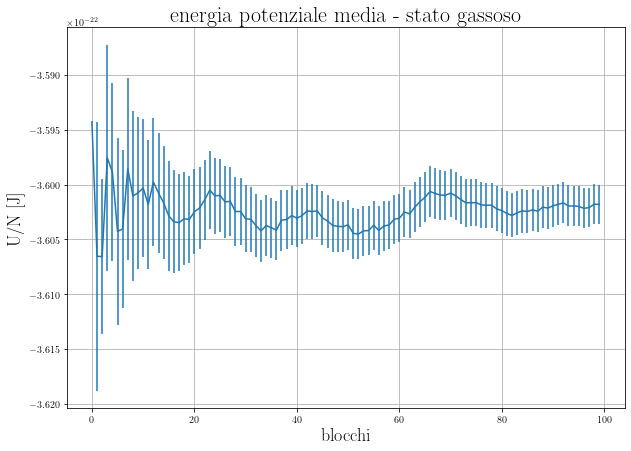

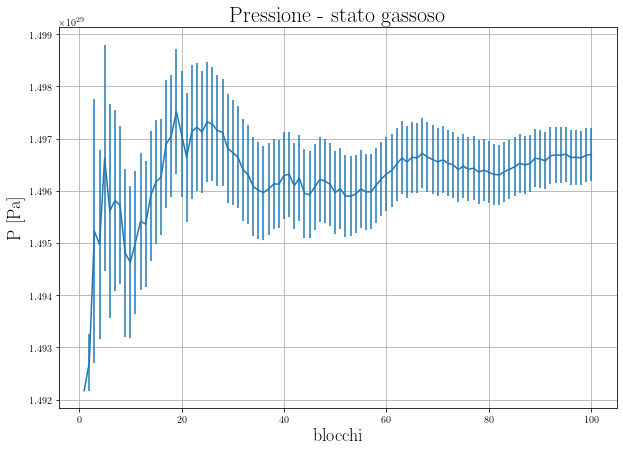

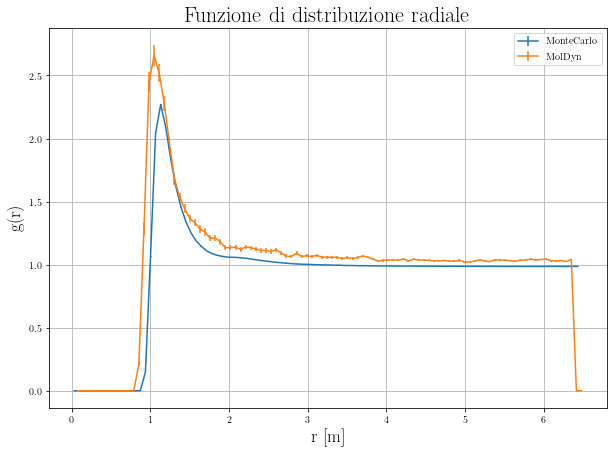

In [11]:
f, error = np.loadtxt("output.epot.gas.0", usecols=(2,3), unpack='true')
x = np.arange(f.size)


plt.figure(figsize=(10,7))
plt.errorbar(x,f_V*f,yerr=f_V*error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.grid(True)

plt.title("energia potenziale media - stato gassoso", fontsize=22)
plt.show()

#pressione

x1, f1, error1 = np.loadtxt("output.pres.gas.0", usecols=(0,2,3), unpack='true')
#x1 = np.arange(f1.size)


plt.figure(figsize=(10,7))
plt.errorbar(x1,P0*f1,yerr=P0*error1)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('P [Pa]', fontsize=18)

plt.title("Pressione - stato gassoso", fontsize=22)
plt.grid(True)
plt.show()

# g(r)

x, f, error = np.loadtxt("output.gave.gas.0", usecols=(0,1,2), unpack='true', delimiter=', ')
x2, f2, error2 = np.loadtxt("output.gave.gas.moldyn.0", usecols=(0,1,2), unpack='true', delimiter=', ')

plt.figure(figsize=(10,7))
plt.errorbar(x,f,yerr=error, label="MonteCarlo")
plt.errorbar(x2+0.046133,f2,yerr=error2, label="MolDyn")
plt.xlabel('r [m]', fontsize=18)
plt.ylabel('g(r)', fontsize=18)
plt.title("Funzione di distribuzione radiale", fontsize = 22)
plt.legend(loc ="best")
plt.grid(True)
plt.show()

Si può notare come per tutte le fasi, nonostante un andamento simile, le $g(r)$ stimate con i due diversi codici non risultino sempre compatibili nei loro errori statistici. 